# Import Library

In [1]:
# file directory manager
import os
import shutil
import pickle
from google.colab import files 

# data process
import numpy as np
import pandas as pd

# tensorflow utils
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# image processing
from PIL import Image
import cv2

# model evaluating
from sklearn.metrics import confusion_matrix, classification_report

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# mount drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Gathering Data

In [ ]:
shutil.rmtree('data', ignore_errors=True)

In [ ]:
! mkdir data

## Download Dataset from Kaggle

In [ ]:
! pip install kaggle

### Initialize Kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

### Download vipoooool/new-plant-diseases-dataset Dataset

In [ ]:
! kaggle datasets download -d vipoooool/new-plant-diseases-dataset
! mkdir data/leaf
! unzip new-plant-diseases-dataset.zip -d data/leaf
os.remove('new-plant-diseases-dataset.zip')

Streaming output truncated to the last 5000 lines.
  inflating: data/leaf/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: data/leaf/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: data/leaf/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: data/leaf/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: data/leaf/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inf

### Download minhhuy2810/rice-diseases-image-dataset Dataset

In [ ]:
! kaggle datasets download -d minhhuy2810/rice-diseases-image-dataset
! mkdir data/leaf
! unzip rice-diseases-image-dataset.zip -d data/leaf
os.remove('rice-diseases-image-dataset.zip')

### Download tahsin/cassava-leaf-disease-merged Dataset

In [ ]:
! kaggle datasets download -d tahsin/cassava-leaf-disease-merged
! mkdir data/leaf/cassava
! unzip cassava-leaf-disease-merged.zip -d data/leaf/cassava
os.remove('cassava-leaf-disease-merged.zip')

### Download lijiyu/imagenet Dataset
Total data : 50k

In [ ]:
! kaggle datasets download -d lijiyu/imagenet
! mkdir data/not_leaf
! unzip imagenet.zip -d data/not_leaf
os.remove('imagenet.zip')

## Copy Dataset

In [ ]:
name_classes = ("leaf", "not_leaf")
mixed_dataset_dir = '/content/data/mixed'
mixed_alldata_dir = '/content/data/mixed/alldata'

In [ ]:
shutil.rmtree(mixed_dataset_dir, ignore_errors=True)

os.mkdir(mixed_dataset_dir)
os.mkdir(mixed_alldata_dir)
for name in name_classes:
  os.mkdir(os.path.join(mixed_alldata_dir, name))

### Copy vipoooool/new-plant-diseases-dataset Dataset

In [ ]:
base_source_dir = "/content/data/leaf/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
target_dir = "/content/data/mixed/alldata/leaf"
class_dir = os.listdir(base_source_dir)
class_dir.sort()

In [ ]:
for dir in class_dir:
  os.mkdir(os.path.join(target_dir, dir))

In [ ]:
def copy_leaf_data(split):
  base_source_dir = "/content/data/leaf/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/{}".format(split)
  source_list = os.listdir(base_source_dir)
  source_list.sort()

  for index, value in enumerate(source_list):
    dest_dir = os.path.join(target_dir, source_list[index])
    source_dir = os.path.join(base_source_dir, source_list[index])
    list_data = os.listdir(source_dir)

    for data in list_data:
      source = os.path.join(source_dir, data)
      dest = os.path.join(dest_dir, data)
      shutil.copy(source, dest)

In [ ]:
copy_leaf_data("train")
copy_leaf_data("valid")

### Copy minhhuy2810/rice-diseases-image-dataset Dataset 

In [ ]:
base_source_dir = "/content/data/leaf/LabelledRice/Labelled"
target_dir = "/content/data/mixed/alldata/leaf"
class_dir = os.listdir(base_source_dir)
class_dir.sort()

In [ ]:
class_dir

['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']

In [ ]:
for dir in class_dir:
  os.mkdir(os.path.join(target_dir, "Rice__{}".format(dir)))

In [ ]:
def copy_leaf_data_2(base_source_dir):
  source_list = os.listdir(base_source_dir)
  source_list.sort()

  for index, value in enumerate(source_list):
    dest_dir = os.path.join(target_dir, "Rice__{}".format(source_list[index]))
    source_dir = os.path.join(base_source_dir, source_list[index])
    list_data = os.listdir(source_dir)

    for data in list_data:
      source = os.path.join(source_dir, data)
      dest = os.path.join(dest_dir, data)
      shutil.copy(source, dest)

In [ ]:
copy_leaf_data_2("/content/data/leaf/LabelledRice/Labelled")
copy_leaf_data_2("/content/data/leaf/RiceDiseaseDataset/train")
copy_leaf_data_2("/content/data/leaf/RiceDiseaseDataset/validation")

### Copy tahsin/cassava-leaf-disease-merged 

In [ ]:
target_dir = "/content/data/mixed/alldata/leaf"
os.mkdir(os.path.join(target_dir, "Cassava"))

In [ ]:
def copy_leaf_data_3():
  base_source_dir = "/content/data/leaf/cassava/train"
  target_dir = "/content/data/mixed/alldata/leaf/Cassava"

  dest_dir = target_dir
  source_dir = base_source_dir
  list_data = os.listdir(source_dir)

  for data in list_data[:-17000]:
    source = os.path.join(source_dir, data)
    dest = os.path.join(dest_dir, data)
    shutil.copy(source, dest)

In [ ]:
copy_leaf_data_3()

### Copy lijiyu/imagenet Dataset

In [ ]:
def copy_not_leaf_data(split):
  base_source_dir = "/content/data/not_leaf/imagenet/{}".format(split)
  target_dir = "/content/data/mixed/alldata/not_leaf"

  dest_dir = target_dir
  source_dir = base_source_dir
  list_data = os.listdir(source_dir)

  for data in list_data:
    source = os.path.join(source_dir, data)
    dest = os.path.join(dest_dir, data)
    shutil.copy(source, dest)

In [ ]:
copy_not_leaf_data("train")
copy_not_leaf_data("val")

# Data Processing

## Check Number of Healthy Image

In [ ]:
class_dir = []

for folder_path in os.listdir("/content/data/mixed/alldata/leaf"):
  if "healthy".lower() in folder_path.lower():
    class_dir.append(folder_path)

In [ ]:
total_data = 0
for folder_path in class_dir:
  length_data = len(os.listdir("/content/data/mixed/alldata/leaf/{}".format(folder_path)))
  total_data = total_data + length_data
  print(folder_path, length_data)

print("Total data:", total_data)

Corn_(maize)___healthy 2324
Peach___healthy 2160
Rice__Healthy 1488
Potato___healthy 2280
Pepper,_bell___healthy 2485
Apple___healthy 2510
Cherry_(including_sour)___healthy 2282
Raspberry___healthy 2226
Grape___healthy 2115
Soybean___healthy 2527
Strawberry___healthy 2280
Blueberry___healthy 2270
Tomato___healthy 2407
Total data: 29354


## Check Number of All Image

In [ ]:
total_data = 0
for folder_path in os.listdir("/content/data/mixed/alldata/leaf"):
  length_data = len(os.listdir("/content/data/mixed/alldata/leaf/{}".format(folder_path)))
  total_data = total_data + length_data
  print(folder_path, length_data)

print("Total data:", total_data)

Corn_(maize)___healthy 2324
Potato___Late_blight 2424
Peach___healthy 2160
Peach___Bacterial_spot 2297
Tomato___Late_blight 2314
Grape___Black_rot 2360
Apple___Cedar_apple_rust 2200
Rice__Healthy 1488
Potato___healthy 2280
Corn_(maize)___Northern_Leaf_Blight 2385
Pepper,_bell___healthy 2485
Tomato___Tomato_mosaic_virus 2238
Rice__LeafBlast 779
Rice__Hispa 565
Tomato___Tomato_Yellow_Leaf_Curl_Virus 2451
Grape___Esca_(Black_Measles) 2400
Tomato___Septoria_leaf_spot 2181
Pepper,_bell___Bacterial_spot 2391
Cassava 9337
Apple___healthy 2510
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 2152
Cherry_(including_sour)___healthy 2282
Tomato___Leaf_Mold 2352
Potato___Early_blight 2424
Tomato___Target_Spot 2284
Raspberry___healthy 2226
Tomato___Bacterial_spot 2127
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot 2052
Apple___Black_rot 2484
Squash___Powdery_mildew 2170
Grape___healthy 2115
Strawberry___Leaf_scorch 2218
Corn_(maize)___Common_rust_ 2384
Soybean___healthy 2527
Tomato___Spider_mites Two

## Combine Leaf Dataset

In [ ]:
name_classes = ("leaf", "not_leaf")
combine_dataset_dir = '/content/data/combine'

In [ ]:
shutil.rmtree(combine_dataset_dir, ignore_errors=True)

os.mkdir(combine_dataset_dir)
for name in name_classes:
  os.mkdir(os.path.join(combine_dataset_dir, name))

### Copy Leaf Dataset

In [ ]:
base_source_dir = "/content/data/mixed/alldata/leaf"
target_dir = "/content/data/combine/leaf"
class_dir = os.listdir(base_source_dir)
class_dir.sort()

In [ ]:
for index, value in enumerate(class_dir):
  dest_dir = target_dir
  source_dir = os.path.join(base_source_dir, value)
  list_data = os.listdir(source_dir)

  for data in list_data:
    source = os.path.join(source_dir, data)
    dest = os.path.join(dest_dir, data)
    shutil.copy(source, dest)

### Copy & Augmentating Non Leaf Dataset

In [ ]:
def augmentating(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.array(img)
  return img, np.fliplr(img)

In [ ]:
dest_dir = "/content/data/combine/not_leaf"
source_dir = "/content/data/mixed/alldata/not_leaf"
list_data = os.listdir(source_dir)

for data in list_data:
  source = os.path.join(source_dir, data)

  name_file = os.path.splitext(data)[0]
  format_file =  os.path.splitext(data)[1]
  
  dest = os.path.join(dest_dir, name_file + format_file)
  dest_flip = os.path.join(dest_dir, name_file + "_flip" + format_file)

  img, img_flip = augmentating(source)

  Image.fromarray(img).save(dest)
  Image.fromarray(img_flip).save(dest_flip)  

## Result Combine

In [ ]:
total_data = 0
for folder_path in os.listdir("/content/data/combine"):
  length_data = len(os.listdir("/content/data/combine/{}".format(folder_path)))
  total_data = total_data + length_data
  print(folder_path, length_data)

print("Total data:", total_data)

not_leaf 100000
leaf 100559
Total data: 200559


show the data distribution

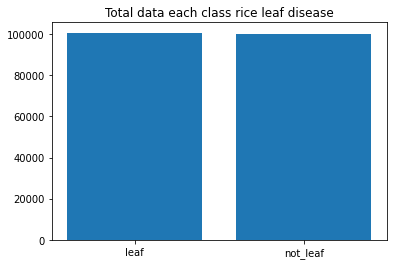

In [ ]:
dict_class = {}

for name_class in name_classes:
  list_file = os.listdir(os.path.join(combine_dataset_dir, name_class))
  dict_class[name_class] = len(list_file)

plt.figure(figsize=(6,4))
plt.bar(x=dict_class.keys(), height=dict_class.values())
plt.title("Total data each class rice leaf disease")
plt.show()

show example image


leaf


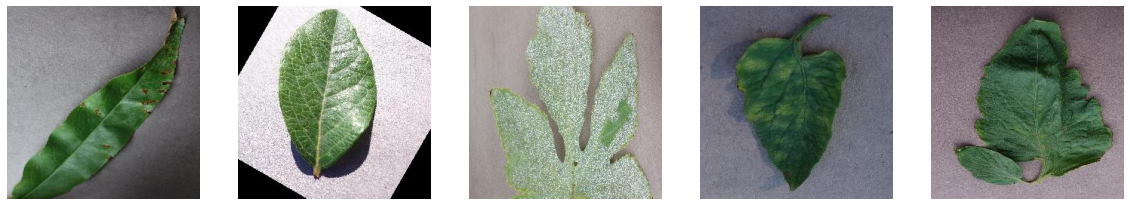


not_leaf


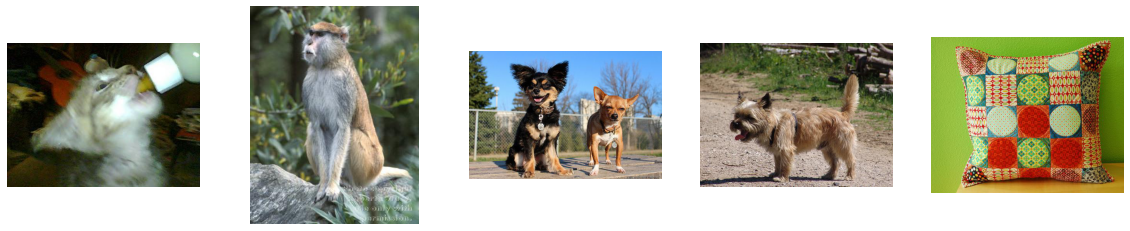

In [ ]:
import random

for name_class in name_classes:
  print("")
  print(name_class)
  class_dir = os.path.join(combine_dataset_dir, name_class)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  random_number = random.randint(10, 90000)
  for i, img_path in enumerate(class_images[random_number:random_number+5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

show minimum and maximum image dimension each class

In [ ]:
for name_class in name_classes:
  dir = os.path.join(combine_dataset_dir, name_class)
  print(name_class)
  
  max_h, min_h, max_w, min_w = 0, 99999, 0, 99999
  avg_h, avg_w = 0, 0

  list_imgs = os.listdir(dir)
  len_list = len(list_imgs)

  for img_name in list_imgs:
    img_path = os.path.join(dir, img_name)
    img = Image.open(img_path)
    
    w, h = img.size

    avg_w = avg_w + w
    avg_h = avg_h + h

    if w > max_w: max_w = w
    if w < min_w: min_w = w
    if h > max_h: max_h = h
    if h < min_h: min_h = h
  
  avg_w = avg_w // len_list
  avg_h = avg_h // len_list
  
  print("min width: {} , max width: {} , avg_width: {}".format(min_w, max_w, avg_w))
  print("min height: {} , max height: {} , avg height: {}".format(min_h, max_h, avg_h))
  print("")

leaf
min width: 256 , max width: 3120 , avg_width: 363
min height: 256 , max height: 3120 , avg height: 347

not_leaf
min width: 54 , max width: 4288 , avg_width: 490
min height: 56 , max height: 5005 , avg height: 430



## Resizing & Save Final Data

In [ ]:
def resizing(img_path, size = 224):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (size, size), interpolation = cv2.INTER_AREA)
  img = np.array(img)
  return img

In [ ]:
name_classes = ("leaf", "not_leaf")
finaldata_dir = 'data/finaldata'

In [ ]:
shutil.rmtree(finaldata_dir, ignore_errors=True)

os.mkdir(finaldata_dir)
for name in name_classes:
  os.mkdir(os.path.join(finaldata_dir, name))

### Save Final Data

In [ ]:
for name_class in name_classes:
  dest_dir = "data/finaldata/{}".format(name_class)
  source_dir = "data/combine/{}".format(name_class)
  list_data = os.listdir(source_dir)

  for data in list_data:
    source = os.path.join(source_dir, data)
    dest = os.path.join(dest_dir, data)

    img = resizing(source)
    Image.fromarray(img).save(dest)
  
  print(name_class, "Done")

In [ ]:
total_data = 0
for folder_path in os.listdir("data/finaldata"):
  length_data = len(os.listdir("data/finaldata/{}".format(folder_path)))
  total_data = total_data + length_data
  print(folder_path, length_data)

print("Total data:", total_data)

not_leaf 100000
leaf 100559
Total data: 200559


archive folder with zip

In [ ]:
!zip -r leaf_finaldata.zip data/finaldata

copy zip to mydrive

In [ ]:
shutil.copy("leaf_finaldata.zip", "drive/Shareddrives/Tanamin Team/Machine Learning/datasets/leaf/leaf_finaldata.zip")

'drive/Shareddrives/Tanamin Team/Machine Learning/datasets/leaf/leaf_finaldata.zip'

# Data Modelling

prepare model save directory

In [3]:
saved_model_dir = "saved_model"
saved_model_his = "saved_model_history"
tflite_model_dir = "tflite_model"

if not(os.path.isdir(saved_model_dir)): os.mkdir(saved_model_dir)
if not(os.path.isdir(saved_model_his)): os.mkdir(saved_model_his)
if not(os.path.isdir(tflite_model_dir)): os.mkdir(tflite_model_dir)

load final data from drive

In [4]:
shutil.rmtree('data/finaldata', ignore_errors=True)
# extract zip file
! unzip "drive/Shareddrives/Tanamin Team/Machine Learning/datasets/leaf/leaf_finaldata.zip" -d .

Streaming output truncated to the last 5000 lines.
  inflating: ./data/finaldata/leaf/f956e968-f26e-4ba0-bb54-d701ff1900d0___UMD_Powd.M 0449.JPG  
  inflating: ./data/finaldata/leaf/24357ee1-a329-4fac-ad7d-1dfbaec7d7f3___RS_NLB 4027_180deg.JPG  
  inflating: ./data/finaldata/leaf/2bf8e05e-8a65-4cf7-8171-3013044c1e9c___JR_HL 8209_new30degFlipLR.JPG  
  inflating: ./data/finaldata/leaf/932e43a7-738f-4864-92e2-745bb715160e___JR_FrgE.S 2997_new30degFlipLR.JPG  
  inflating: ./data/finaldata/leaf/3257543417.jpg  
  inflating: ./data/finaldata/leaf/c17a8d9b-f000-4df3-9673-444de04b7dbd___RS_GLSp 9309_270deg.JPG  
  inflating: ./data/finaldata/leaf/fd530597-32df-4d80-bae0-4af7a8ebcb92___RS_HL 4771_270deg.JPG  
  inflating: ./data/finaldata/leaf/2b2c841a-f3e8-4861-83d4-c00eaace0049___Com.G_TgS_FL 9897_flipTB.JPG  
  inflating: ./data/finaldata/leaf/ee1579af-b5b4-49a9-858d-4af55c71b7d6___RS_HL 2326.JPG  
  inflating: ./data/finaldata/leaf/c47a78d3-0cac-4beb-985d-4273d85020e3___RS_HL 4442.JPG  
 

## Init Method

In [5]:
name_classes = ['leaf','not_leaf']

In [6]:
# define my callbacks include (EarlyStopping, ModelCheckpoint)
def my_callbacks(filename):
  es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)
  mc = ModelCheckpoint(filename, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

  return [mc]

In [7]:
# define method for showing plot learning curves
def plot_learning_curves(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(6, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,1.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

In [8]:
# define confusion matrix method
def conf_matrix(y_test, y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)

  ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')

  ax.set_title('Confusion Matrix with labels\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(name_classes, rotation=45)
  ax.yaxis.set_ticklabels(name_classes, rotation=45)

  plt.show()

In [9]:
# define classification report method
def class_report(y_test, y_pred):
  print("Labels: ", name_classes)
  print()
  print(classification_report(y_test, y_pred))

In [10]:
# save model method
def saved_model(modelname, model):
  export_path = os.path.join(saved_model_dir, modelname)
  if os.path.isdir(export_path):
    print('\nAlready saved a model, replace to new model\n')
    shutil.rmtree(export_path, ignore_errors=True)

  model.save(export_path)
  print("Export path: ", export_path)
  print(os.listdir(export_path))

# save model history method
def saved_model_history(modelname, history):
  with open(os.path.join(saved_model_his, modelname), 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [11]:
# convert saved model to TFLite model
def tflite_model_convert(modelname, tflitedir):
  # Intialize the TFLite converter to load the SavedModel
  export_path = os.path.join(saved_model_dir, modelname)

  converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

  # Set the optimization strategy in the converter 
  converter.optimizations = [tf.lite.Optimize.DEFAULT]

  # Use the tool to finally convert the model
  tflite_model = converter.convert()

  # Write TFLite model
  tflite_dir = os.path.join(tflite_model_dir, tflitedir)

  if os.path.isdir(tflite_dir):
    print('\nAlready saved a model, replace to new model\n')
    shutil.rmtree(tflite_dir, ignore_errors=True)

  os.mkdir(tflite_dir)

  tflite_file = os.path.join(tflite_dir, "leaf_{}.tflite".format(tflitedir.lower()))
  label_file = os.path.join(tflite_dir, "leaf_{}.txt".format(tflitedir.lower()))

  with open(tflite_file, "wb") as f:
      f.write(tflite_model)

  with open(label_file, 'w') as f:
      f.write('\n'.join(name_classes))

  print("Export path: ", tflite_dir)
  print(os.listdir(tflite_dir))

In [12]:
# save all model with simplify function
def save_all_model(modelname, model, history):
  # save model
  saved_model(modelname, model)

  # save history as dict
  saved_model_history(modelname, history)

  # save best model
  best_model = tf.keras.models.load_model('best_{}.h5'.format(modelname))
  best_modelname = "BestMC_{}".format(modelname)
  saved_model(best_modelname, best_model)
  # clear best model h5 format
  os.remove('best_{}.h5'.format(modelname))

  # save tflite best model
  tflite_model_convert(best_modelname, modelname)

  %cp -av "/content/saved_model_history" "/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models"
  %cp -av "/content/saved_model" "/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models"
  %cp -av "/content/tflite_model" "/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models"

## Preparing ImageDataGenerator

In [73]:
finaldata_dir = "data/finaldata"
img_dim = 224
img_shape = (224, 224, 3)

In [90]:
datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.15 
)

train_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size =(img_dim, img_dim),
    batch_size = 100,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size = (img_dim,img_dim),
    batch_size = 100,
    class_mode = 'categorical',
    subset='validation',
    shuffle=False
)

Found 170476 images belonging to 2 classes.
Found 30083 images belonging to 2 classes.


In [91]:
train_generator.class_indices

{'leaf': 0, 'not_leaf': 1}

In [92]:
labels = []
for label in train_generator.class_indices:
  labels.append(label)

name_classes = labels
num_labels = len(labels)

print("Labels: {}".format(name_classes))
print("Num labels: {}".format(num_labels))

Labels: ['leaf', 'not_leaf']
Num labels: 2


## Model 1

In [111]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=img_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='sigmoid')  
])

model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_122 (Conv2D)         (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_123 (Conv2D)         (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 54, 54, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_124 (Conv2D)         (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 26, 26, 32)     

In [112]:
model1.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [113]:
# fitting model
history1 = model1.fit(
    train_generator,
    epochs = 15,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = my_callbacks("best_OwnModel.h5"),
)

Epoch 1/15
1705/1705 [==============================] - ETA: 0s - loss: 0.0821 - accuracy: 0.9707
Epoch 1: val_accuracy improved from -inf to 0.98325, saving model to best_OwnModel.h5
1705/1705 [==============================] - 334s 195ms/step - loss: 0.0821 - accuracy: 0.9707 - val_loss: 0.0530 - val_accuracy: 0.9832
Epoch 2/15
1705/1705 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9859
Epoch 2: val_accuracy improved from 0.98325 to 0.98464, saving model to best_OwnModel.h5
1705/1705 [==============================] - 331s 194ms/step - loss: 0.0411 - accuracy: 0.9859 - val_loss: 0.0482 - val_accuracy: 0.9846
Epoch 3/15
1705/1705 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9891
Epoch 3: val_accuracy improved from 0.98464 to 0.98757, saving model to best_OwnModel.h5
1705/1705 [==============================] - 328s 192ms/step - loss: 0.0317 - accuracy: 0.9891 - val_loss: 0.0412 - val_accuracy: 0.9876
Epoch 4/15
1705/1705 [=========

In [114]:
score_train = model1.evaluate(train_generator)
score_valid = model1.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

301/301 [==============================] - 48s 159ms/step - loss: 0.0589 - accuracy: 0.9904
Accuracy (train):  0.9984337687492371
Accuracy (test): 0.9903600215911865
Loss (train):  0.004671168047934771
Loss (test): 0.05890873819589615


### Plot Learning Curves

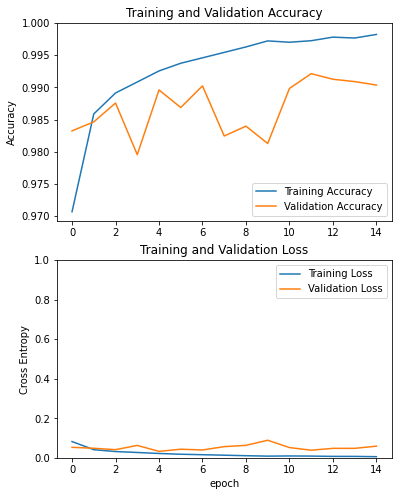

In [115]:
plot_learning_curves(history1)

### Confusion Matrix & Classification Report

In [116]:
y_test = validation_generator.classes
y_pred = model1.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


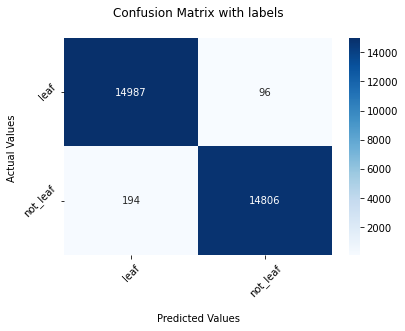

In [117]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [118]:
# show classification report
class_report(y_test, y_pred)

Labels:  ['leaf', 'not_leaf']

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15083
           1       0.99      0.99      0.99     15000

    accuracy                           0.99     30083
   macro avg       0.99      0.99      0.99     30083
weighted avg       0.99      0.99      0.99     30083



### Save Model

In [119]:
# save model
modelname = "OwnModel"
save_all_model(modelname, model1, history1)

Export path:  saved_model/OwnModel
['keras_metadata.pb', 'variables', 'saved_model.pb', 'assets']
Export path:  saved_model/BestMC_OwnModel
['keras_metadata.pb', 'variables', 'saved_model.pb', 'assets']
Export path:  tflite_model/OwnModel
['leaf_ownmodel.tflite', 'leaf_ownmodel.txt']
'/content/saved_model_history/MobileNetV2' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model_history/MobileNetV2'
'/content/saved_model_history/InceptionV3' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model_history/InceptionV3'
'/content/saved_model_history/DenseNet121' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model_history/DenseNet121'
'/content/saved_model_history/OwnModel' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model_history/OwnModel'
'/content/saved_model/InceptionV3/variables/variables.data-00000-of-00001' -> '/content/drive

## Model 2

In [17]:
from tensorflow.keras.applications import ResNet50    # underfit
from tensorflow.keras.applications import ResNet152V2 # overfit

model2 = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=tf.keras.layers.Input(shape=img_shape)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='sigmoid')  
])

model2.layers[0].trainable = False

model2.summary()

234561536/234545216 [==============================] - 8s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 58,856,706
Trainable params: 525,058
Non-

In [18]:
model2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9),
              metrics=['accuracy'])

In [19]:
history2 = model2.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = my_callbacks("best_ResNet152V2.h5")
)

Epoch 1/10
853/853 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9873
Epoch 1: val_accuracy improved from -inf to 0.99388, saving model to best_ResNet152V2.h5
853/853 [==============================] - 714s 816ms/step - loss: 0.0421 - accuracy: 0.9873 - val_loss: 0.0247 - val_accuracy: 0.9939
Epoch 2/10
853/853 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9956
Epoch 2: val_accuracy improved from 0.99388 to 0.99498, saving model to best_ResNet152V2.h5
853/853 [==============================] - 692s 811ms/step - loss: 0.0161 - accuracy: 0.9956 - val_loss: 0.0203 - val_accuracy: 0.9950
Epoch 3/10
853/853 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9964
Epoch 3: val_accuracy improved from 0.99498 to 0.99535, saving model to best_ResNet152V2.h5
853/853 [==============================] - 692s 811ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.0180 - val_accuracy: 0.9953
Epoch 4/10
853/853 [==============

In [20]:
score_train = model2.evaluate(train_generator)
score_valid = model2.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

151/151 [==============================] - 104s 684ms/step - loss: 0.0130 - accuracy: 0.9964
Accuracy (train):  0.9979469180107117
Accuracy (test): 0.9964099526405334
Loss (train):  0.006830098573118448
Loss (test): 0.013036362826824188


### Plot Learning Curves

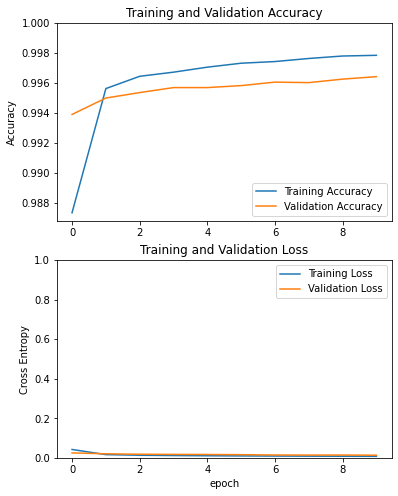

In [21]:
plot_learning_curves(history2)

### Confusion Matrix & Classification Report

In [22]:
y_test = validation_generator.classes
y_pred = model2.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


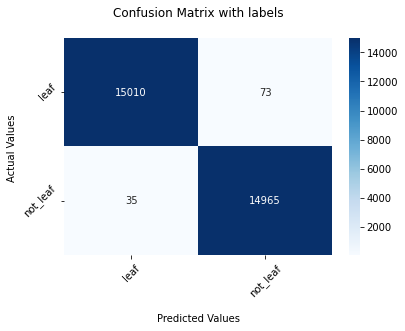

In [23]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [24]:
# show classification report
class_report(y_test, y_pred)

Labels:  ['leaf', 'not_leaf']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15083
           1       1.00      1.00      1.00     15000

    accuracy                           1.00     30083
   macro avg       1.00      1.00      1.00     30083
weighted avg       1.00      1.00      1.00     30083



### Save Model

In [25]:
# save model
modelname = "ResNet152V2"
save_all_model(modelname, model2, history2)

Export path:  saved_model/ResNet152V2
['variables', 'saved_model.pb', 'keras_metadata.pb', 'assets']
Export path:  saved_model/BestMC_ResNet152V2
['variables', 'saved_model.pb', 'keras_metadata.pb', 'assets']
Export path:  tflite_model/ResNet152V2
['leaf_resnet152v2.txt', 'leaf_resnet152v2.tflite']
'/content/saved_model_history/ResNet152V2' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model_history/ResNet152V2'
'/content/saved_model/ResNet152V2' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model/ResNet152V2'
'/content/saved_model/ResNet152V2/variables' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model/ResNet152V2/variables'
'/content/saved_model/ResNet152V2/variables/variables.data-00000-of-00001' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model/ResNet152V2/variables/variables.data-00000-of-00001'
'/content/saved_mode

## Model 3

In [77]:
from tensorflow.keras.applications.densenet import DenseNet121

model3 = tf.keras.Sequential([
    DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=img_shape),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='sigmoid')
])

model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 dropout_9 (Dropout)         (None, 7, 7, 1024)        0         
                                                                 
 global_average_pooling2d_7   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_18 (Dense)            (None, 256)               262400    
                                                                 
 dense_19 (Dense)            (None, 2)                 514       
                                                                 
Total params: 7,300,418
Trainable params: 7,216,770
Non-trainable params: 83,648
_______________________________________

In [78]:
model3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9),
              metrics=['accuracy'])

In [79]:
history3 = model3.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = my_callbacks("best_DenseNet121.h5"),
)

Epoch 1/10
3410/3410 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.9974
Epoch 1: val_accuracy improved from -inf to 0.99860, saving model to best_DenseNet121.h5
3410/3410 [==============================] - 1003s 290ms/step - loss: 0.0092 - accuracy: 0.9974 - val_loss: 0.0069 - val_accuracy: 0.9986
Epoch 2/10
3410/3410 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 2: val_accuracy improved from 0.99860 to 0.99887, saving model to best_DenseNet121.h5
3410/3410 [==============================] - 986s 289ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0039 - val_accuracy: 0.9989
Epoch 3/10
3410/3410 [==============================] - ETA: 0s - loss: 5.2855e-04 - accuracy: 0.9999
Epoch 3: val_accuracy improved from 0.99887 to 0.99914, saving model to best_DenseNet121.h5
3410/3410 [==============================] - 990s 290ms/step - loss: 5.2855e-04 - accuracy: 0.9999 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 4/10
34

In [80]:
score_train = model3.evaluate(train_generator)
score_valid = model3.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

602/602 [==============================] - 59s 98ms/step - loss: 0.0044 - accuracy: 0.9992
Accuracy (train):  1.0
Accuracy (test): 0.9991689920425415
Loss (train):  4.5357305680227e-06
Loss (test): 0.004356769844889641


### Plot Learning Curves

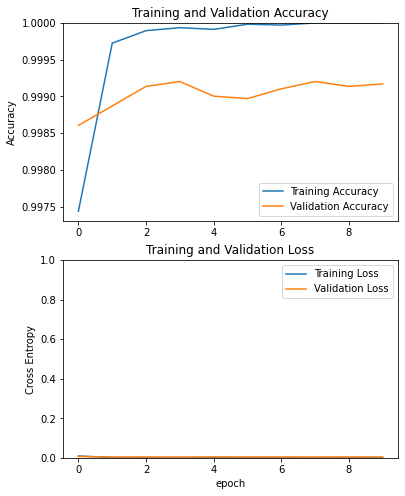

In [81]:
plot_learning_curves(history3)

### Confusion Matrix & Classification Report

In [82]:
y_test = validation_generator.classes
y_pred = model3.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


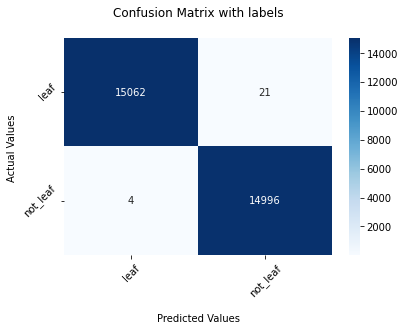

In [83]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [84]:
# show classification report
class_report(y_test, y_pred)

Labels:  ['leaf', 'not_leaf']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15083
           1       1.00      1.00      1.00     15000

    accuracy                           1.00     30083
   macro avg       1.00      1.00      1.00     30083
weighted avg       1.00      1.00      1.00     30083



### Save Model

In [85]:
# save model
modelname = "DenseNet121"
save_all_model(modelname, model3, history3)

Export path:  saved_model/DenseNet121
['keras_metadata.pb', 'variables', 'saved_model.pb', 'assets']
Export path:  saved_model/BestMC_DenseNet121
['keras_metadata.pb', 'variables', 'saved_model.pb', 'assets']
Export path:  tflite_model/DenseNet121
['leaf_densenet121.txt', 'leaf_densenet121.tflite']
'/content/saved_model_history/MobileNetV2' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model_history/MobileNetV2'
'/content/saved_model_history/InceptionV3' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model_history/InceptionV3'
'/content/saved_model_history/DenseNet121' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model_history/DenseNet121'
'/content/saved_model/InceptionV3/variables/variables.data-00000-of-00001' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model/InceptionV3/variables/variables.data-00000-of-00001'
'/conten

## Model 4

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=img_shape,
                                include_top=False,
                                weights='imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = True

pre_trained_model.summary()

In [23]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(num_labels, activation='sigmoid')(x) 

model4 = tf.keras.Model(pre_trained_model.input, x)

model4.summary()

In [25]:
model4.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9),
              metrics=['accuracy'])

In [26]:
history4 = model4.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = my_callbacks("best_InceptionV3.h5"),
)

Epoch 1/10
853/853 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9936
Epoch 1: val_accuracy improved from -inf to 0.99771, saving model to best_InceptionV3.h5
853/853 [==============================] - 597s 689ms/step - loss: 0.0213 - accuracy: 0.9936 - val_loss: 0.0087 - val_accuracy: 0.9977
Epoch 2/10
853/853 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9991
Epoch 2: val_accuracy did not improve from 0.99771
853/853 [==============================] - 581s 681ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0082 - val_accuracy: 0.9976
Epoch 3/10
853/853 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.9997
Epoch 3: val_accuracy improved from 0.99771 to 0.99791, saving model to best_InceptionV3.h5
853/853 [==============================] - 582s 682ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0074 - val_accuracy: 0.9979
Epoch 4/10
853/853 [==============================] - ETA: 0s - loss: 9.578

In [27]:
score_train = model4.evaluate(train_generator)
score_valid = model4.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

151/151 [==============================] - 51s 335ms/step - loss: 0.0082 - accuracy: 0.9980
Accuracy (train):  1.0
Accuracy (test): 0.9979722499847412
Loss (train):  3.82129437639378e-05
Loss (test): 0.00817946344614029


### Plot Learning Curves

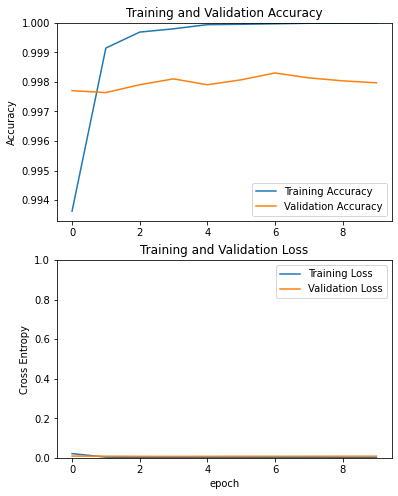

In [28]:
plot_learning_curves(history4)

### Confusion Matrix & Classification Report

In [29]:
y_test = validation_generator.classes
y_pred = model4.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


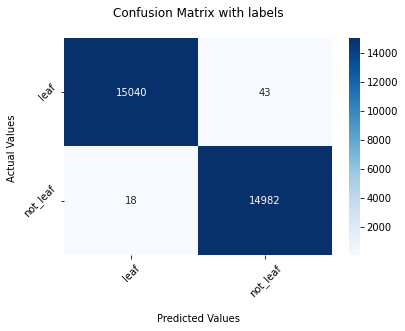

In [30]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [31]:
# show classification report
class_report(y_test, y_pred)

Labels:  ['leaf', 'not_leaf']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15083
           1       1.00      1.00      1.00     15000

    accuracy                           1.00     30083
   macro avg       1.00      1.00      1.00     30083
weighted avg       1.00      1.00      1.00     30083



### Save Model

In [32]:
# save model
modelname = "InceptionV3"
save_all_model(modelname, model4, history4)

Export path:  saved_model/InceptionV3
['keras_metadata.pb', 'variables', 'saved_model.pb', 'assets']
Export path:  saved_model/BestMC_InceptionV3
['keras_metadata.pb', 'variables', 'saved_model.pb', 'assets']
Export path:  tflite_model/InceptionV3
['leaf_inceptionv3.tflite', 'leaf_inceptionv3.txt']
'/content/saved_model_history/InceptionV3' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model_history/InceptionV3'
'/content/saved_model/InceptionV3' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model/InceptionV3'
'/content/saved_model/InceptionV3/variables' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model/InceptionV3/variables'
'/content/saved_model/InceptionV3/variables/variables.data-00000-of-00001' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model/InceptionV3/variables/variables.data-00000-of-00001'
'/content/saved_mode

## Model 5

In [33]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 

model5 = tf.keras.models.Sequential([
    MobileNetV2(weights="imagenet", include_top=False, input_shape=img_shape),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='sigmoid')  
])

model5.layers[0].trainable = False

model5.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 1280)        0         
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 256)               327936    
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                         

In [34]:
model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
history5 = model5.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = my_callbacks("best_MobileNetV2.h5"),
)

Epoch 1/10
853/853 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9950
Epoch 1: val_accuracy improved from -inf to 0.99624, saving model to best_MobileNetV2.h5
853/853 [==============================] - 347s 402ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0125 - val_accuracy: 0.9962
Epoch 2/10
853/853 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9981
Epoch 2: val_accuracy improved from 0.99624 to 0.99628, saving model to best_MobileNetV2.h5
853/853 [==============================] - 333s 391ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0122 - val_accuracy: 0.9963
Epoch 3/10
853/853 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9987
Epoch 3: val_accuracy improved from 0.99628 to 0.99648, saving model to best_MobileNetV2.h5
853/853 [==============================] - 331s 388ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0127 - val_accuracy: 0.9965
Epoch 4/10
853/853 [==============

In [36]:
score_train = model5.evaluate(train_generator)
score_valid = model5.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

151/151 [==============================] - 51s 339ms/step - loss: 0.0148 - accuracy: 0.9973
Accuracy (train):  0.9999530911445618
Accuracy (test): 0.9973074197769165
Loss (train):  0.00014128407929092646
Loss (test): 0.014760314486920834


### Plot Learning Curves

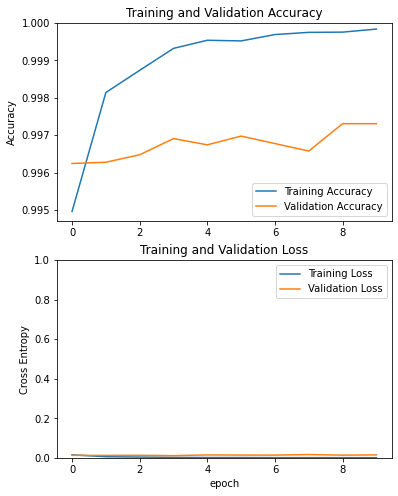

In [43]:
plot_learning_curves(history5)

### Confusion Matrix & Classification Report

In [42]:
y_test = validation_generator.classes
y_pred = model5.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


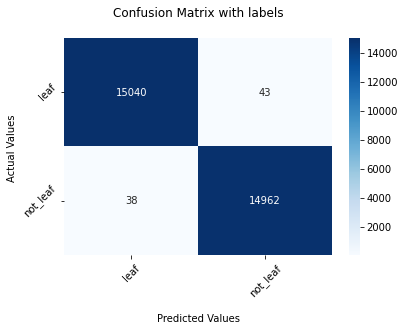

In [44]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [45]:
# show classification report
class_report(y_test, y_pred)

Labels:  ['leaf', 'not_leaf']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15083
           1       1.00      1.00      1.00     15000

    accuracy                           1.00     30083
   macro avg       1.00      1.00      1.00     30083
weighted avg       1.00      1.00      1.00     30083



### Save Model

In [41]:
# save model
modelname = "MobileNetV2"
save_all_model(modelname, model5, history5)

Export path:  saved_model/MobileNetV2
['keras_metadata.pb', 'variables', 'saved_model.pb', 'assets']


Export path:  saved_model/BestMC_MobileNetV2
['keras_metadata.pb', 'variables', 'saved_model.pb', 'assets']
Export path:  tflite_model/MobileNetV2
['leaf_mobilenetv2.tflite', 'leaf_mobilenetv2.txt']
'/content/saved_model_history/MobileNetV2' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model_history/MobileNetV2'
'/content/saved_model_history/InceptionV3' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model_history/InceptionV3'
'/content/saved_model/InceptionV3/variables/variables.data-00000-of-00001' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model/InceptionV3/variables/variables.data-00000-of-00001'
'/content/saved_model/InceptionV3/variables/variables.index' -> '/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model/InceptionV3/variables/variables.index'
'/content/saved_model/InceptionV3/saved_model.pb' -> '/content/drive/Shar

# Load All Model 

In [120]:
# delete folder
shutil.rmtree('saved_model', ignore_errors=True)
shutil.rmtree('saved_model_history', ignore_errors=True)
shutil.rmtree('tflite_model', ignore_errors=True)

In [ ]:
# copy folder
%cp -av "/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model_history" "/content"
%cp -av "/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/saved_model" "/content"
%cp -av "/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/leaf_models/tflite_model" "/content"

# Choosing The Model

## Plot History All Model

In [122]:
list_modelnames = ["OwnModel", "ResNet152V2", "DenseNet121", "InceptionV3", "MobileNetV2"]
dict_histories = {}
saved_model_his = "saved_model_history"

# load model into new variable
for modelname in list_modelnames:
  with open(os.path.join(saved_model_his, modelname), 'rb') as file_pi:
    dict_histories[modelname] = pickle.load(file_pi)

dict_histories.keys()

dict_keys(['OwnModel', 'ResNet152V2', 'DenseNet121', 'InceptionV3', 'MobileNetV2'])

comparing accuracy history all model

In [123]:
dict_acc = {}
dict_val_acc = {}
dict_loss = {}
dict_val_loss = {}

for modelname in list_modelnames:
  dict_acc[modelname] = dict_histories[modelname]['accuracy']
  dict_val_acc[modelname] = dict_histories[modelname]['val_accuracy']
  dict_loss[modelname] = dict_histories[modelname]['loss']
  dict_val_loss[modelname] = dict_histories[modelname]['val_loss']

label_plot = ['Own Model','ResNet152V2','DenseNet121','InceptionV3','MobileNetV2']
marker_plot = ['o','x','v','^','d']

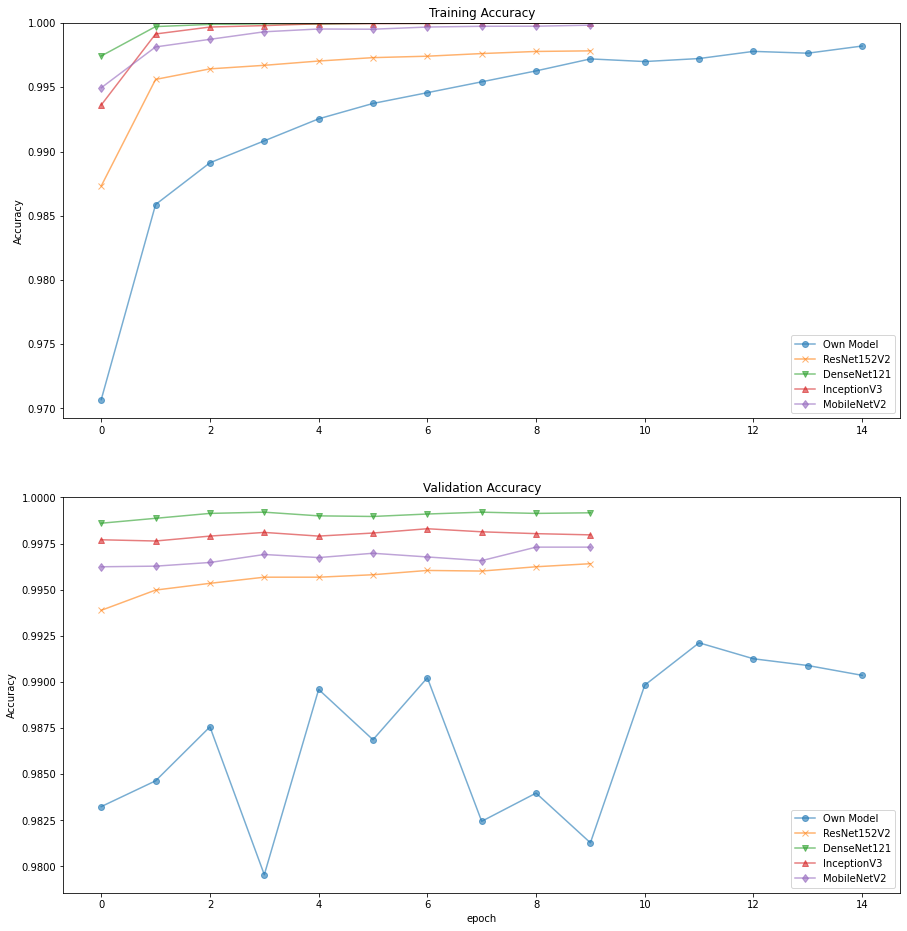

In [133]:
plt.figure(figsize=(15, 16))
plt.subplot(2, 1, 1)
for i in range(len(list_modelnames)):
  plt.plot(dict_acc[list_modelnames[i]], label=label_plot[i], marker=marker_plot[i], markersize=6, alpha=0.6)

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.0])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
for i in range(len(list_modelnames)):
  plt.plot(dict_val_acc[list_modelnames[i]], label=label_plot[i], marker=marker_plot[i], markersize=6, alpha=0.6)

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.0])
plt.title('Validation Accuracy')
plt.xlabel('epoch')
plt.savefig('acc_all_model.png')

plt.show()

comparing loss history all model

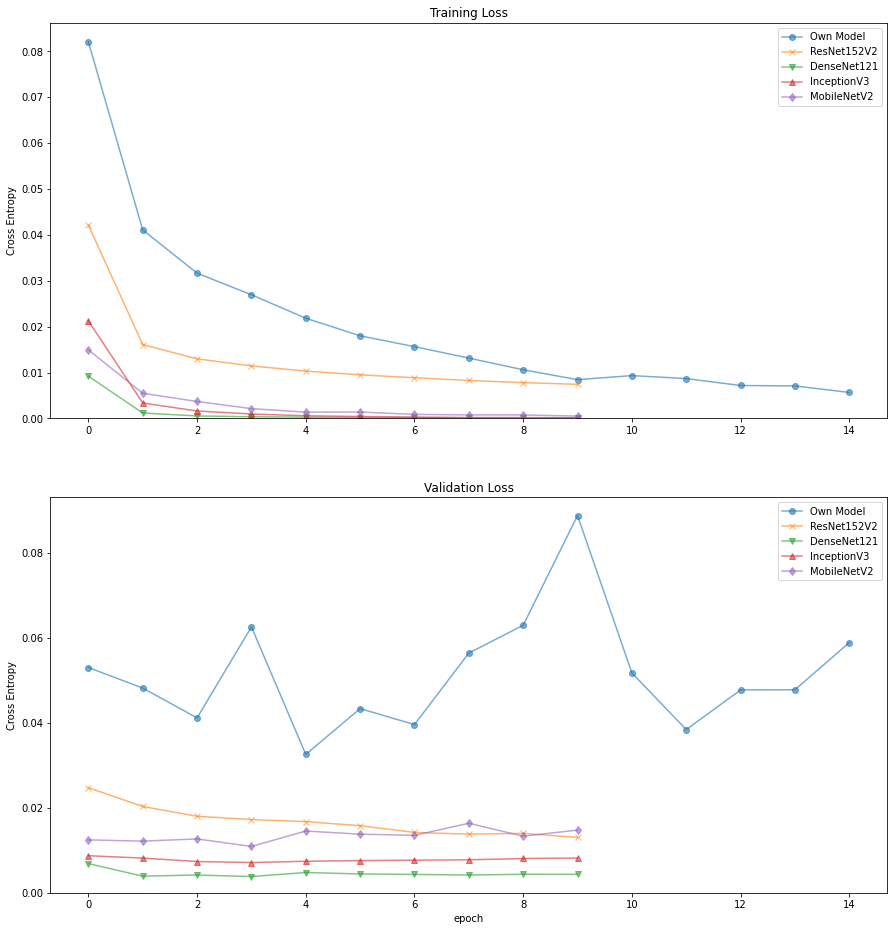

In [132]:
plt.figure(figsize=(15, 16))
plt.subplot(2, 1, 1)

for i in range(len(list_modelnames)):
  plt.plot(dict_loss[list_modelnames[i]], label=label_plot[i], marker=marker_plot[i], markersize=6, alpha=0.6)

plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, max(plt.ylim())])
plt.title('Training Loss')

plt.subplot(2, 1, 2)

for i in range(len(list_modelnames)):
  plt.plot(dict_val_loss[list_modelnames[i]], label=label_plot[i], marker=marker_plot[i], markersize=6, alpha=0.6)
  
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, max(plt.ylim())])
plt.title('Validation Loss')
plt.xlabel('epoch')

plt.savefig('loss_all_model.png')

plt.show()

## Plot Performance All Best Model

In [126]:
list_modelnames = ["OwnModel", "ResNet152V2", "DenseNet121", "InceptionV3", "MobileNetV2"]
dict_models = {}

# load model into new variable
for modelname in list_modelnames:
  dict_models[modelname] = tf.keras.models.load_model('saved_model/BestMC_{}'.format(modelname))

dict_models.keys()

dict_keys(['OwnModel', 'ResNet152V2', 'DenseNet121', 'InceptionV3', 'MobileNetV2'])

In [127]:
# evaluate all model
dict_score_train = {}
dict_score_valid = {}

for modelname in list_modelnames:
  dict_score_train[modelname] = dict_models[modelname].evaluate(train_generator)
  dict_score_valid[modelname] = dict_models[modelname].evaluate(validation_generator)

301/301 [==============================] - 50s 166ms/step - loss: 0.0133 - accuracy: 0.9973


In [128]:
# prepare data before plot
df1 = pd.DataFrame({
    'Model': list_modelnames,
    'Train': [eval[1] for eval in dict_score_train.values()],
    'Valid': [eval[1] for eval in dict_score_valid.values()],
})

df2 = pd.DataFrame({
    'Model': list_modelnames,
    'Train': [eval[0] for eval in dict_score_train.values()],
    'Valid': [eval[0] for eval in dict_score_valid.values()],
})

tidy1 = df1.melt(id_vars='Model').rename(columns=str.title)

tidy2 = df2.melt(id_vars='Model').rename(columns=str.title)

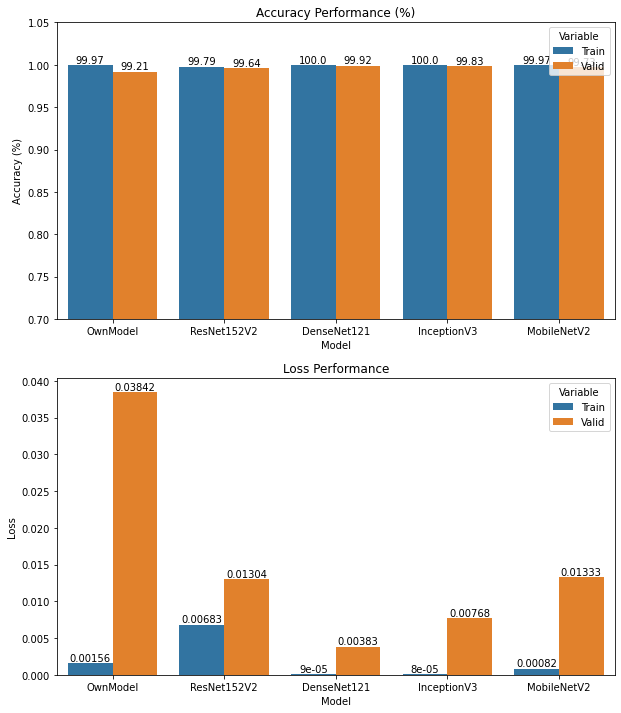

In [129]:
# plot comparison all models evaluate
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# first plot
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy1, ax=ax1)
ax1.set_ylabel('Accuracy (%)')
ax1.set_ylim([0.7 ,1.05])
ax1.set_title('Accuracy Performance (%)')

for p, data in zip(ax1.patches, tidy1['Value']):
    ax1.annotate(round(data*100, 2), xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

# second plot
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy2, ax=ax2)
ax2.set_ylabel('Loss')
ax2.set_title('Loss Performance')

for p, data in zip(ax2.patches, tidy2['Value']):
    ax2.annotate(round(data, 5), xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.savefig('evaluate_all_model.png')
plt.show()

## Conclusion

**DenseNet121 Model** has high accuracy and lower loss also the model is not too complex, it will be used for Rice Leaf Disease Prediction feature

# Predict Model with User Image Input

In [ ]:
best_model = tf.keras.models.load_model('saved_model/BestMC_DenseNet121')

In [ ]:
# get user image input
labels = ['Blight', 'BrownSpot', 'Healthy', 'Tungro']

uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  images /= 255

  classes = best_model.predict(images, batch_size=32)
  predicted_class_indices=np.argmax(classes)


print("\nPredict:")
if predicted_class_indices == 0:
  print('Blight')
elif predicted_class_indices == 1:
  print('BrownSpot')
elif predicted_class_indices == 2:
  print('Healthy')
elif predicted_class_indices == 3:
  print('Tungro')

print("\nProbablity:")
for idx, val in enumerate(labels):
  print("{} : {:.2f}%".format(val, classes[0][idx] * 100))